In [2]:
import netCDF4 as nc
from netCDF4 import num2date,date2index
import datetime
import csv
import numpy as np
import pandas as pd
import xarray as xr
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.preprocessing import normalize
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression
import numpy as np

In [3]:
data = nc.Dataset('sst.nc')

In [4]:
data

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    CDI: Climate Data Interface version 1.9.10 (https://mpimet.mpg.de/cdi)
    source: NOAA/NESDIS/National Climatic Data Center
    institution: NOAA/NESDIS/National Climatic Data Center
    Conventions: CF-1.0
    title: NOAA Extended Reconstructed SST V3b
    comments: The extended reconstructed sea surface temperature (ERSST)
was constructed using the most recently available 
Comprehensive Ocean-Atmosphere Data Set (COADS) SST data 
and improved statistical methods that allow stable 
reconstruction using sparse data.
Currently, ERSST version 2 (ERSST.v2) and version 3 (ERSST.v3) and ERSST.v3b) are available from NCDC.
ERSST.v3b is an improved extended reconstruction over version 2.
 but with no satellite data 
    platform: Model
    citation: Smith, T.M., R.W. Reynolds, Thomas C. Peterson, and Jay Lawrimore 2007: Improvements to NOAA's Historical Merged Land-Ocean Surface Temperature Anal

In [5]:
sst = data.variables['sst']
print(sst)

<class 'netCDF4._netCDF4.Variable'>
float32 sst(time, lat, lon)
    long_name: Monthly Means of Sea Surface Temperature
    units: degC
    _FillValue: -9.96921e+36
    missing_value: -9.96921e+36
    precision: 2
    least_significant_digit: 1
    var_desc: Sea Surface Temperature
    dataset: NOAA Extended Reconstructed SST V3b
    level_desc: Surface
    statistic: Mean
    parent_stat: Mean
    actual_range: [-1.8  33.95]
unlimited dimensions: time
current shape = (708, 89, 180)
filling off


In [6]:
np.max(sst)

33.95

In [7]:
np.min(sst)

-9.96921e+36

In [8]:
latitude = data.variables['lat']
print(latitude)

<class 'netCDF4._netCDF4.Variable'>
float32 lat(lat)
    standard_name: latitude
    long_name: Latitude
    units: degrees_north
    axis: Y
    actual_range: [ 88. -88.]
unlimited dimensions: 
current shape = (89,)
filling off


In [9]:
latitude[:]

masked_array(data=[ 88.,  86.,  84.,  82.,  80.,  78.,  76.,  74.,  72.,
                    70.,  68.,  66.,  64.,  62.,  60.,  58.,  56.,  54.,
                    52.,  50.,  48.,  46.,  44.,  42.,  40.,  38.,  36.,
                    34.,  32.,  30.,  28.,  26.,  24.,  22.,  20.,  18.,
                    16.,  14.,  12.,  10.,   8.,   6.,   4.,   2.,   0.,
                    -2.,  -4.,  -6.,  -8., -10., -12., -14., -16., -18.,
                   -20., -22., -24., -26., -28., -30., -32., -34., -36.,
                   -38., -40., -42., -44., -46., -48., -50., -52., -54.,
                   -56., -58., -60., -62., -64., -66., -68., -70., -72.,
                   -74., -76., -78., -80., -82., -84., -86., -88.],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [10]:
longitude = data.variables['lon']
print(longitude)

<class 'netCDF4._netCDF4.Variable'>
float32 lon(lon)
    standard_name: longitude
    long_name: Longitude
    units: degrees_east
    axis: X
    actual_range: [  0. 358.]
unlimited dimensions: 
current shape = (180,)
filling off


In [11]:
longitude[:]

masked_array(data=[  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,
                    18.,  20.,  22.,  24.,  26.,  28.,  30.,  32.,  34.,
                    36.,  38.,  40.,  42.,  44.,  46.,  48.,  50.,  52.,
                    54.,  56.,  58.,  60.,  62.,  64.,  66.,  68.,  70.,
                    72.,  74.,  76.,  78.,  80.,  82.,  84.,  86.,  88.,
                    90.,  92.,  94.,  96.,  98., 100., 102., 104., 106.,
                   108., 110., 112., 114., 116., 118., 120., 122., 124.,
                   126., 128., 130., 132., 134., 136., 138., 140., 142.,
                   144., 146., 148., 150., 152., 154., 156., 158., 160.,
                   162., 164., 166., 168., 170., 172., 174., 176., 178.,
                   180., 182., 184., 186., 188., 190., 192., 194., 196.,
                   198., 200., 202., 204., 206., 208., 210., 212., 214.,
                   216., 218., 220., 222., 224., 226., 228., 230., 232.,
                   234., 236., 238., 240., 242., 24

In [12]:
time = data.variables['time']
time_ = time[:]
time_units = time.units
time_calendar = time.calendar
time_dates = num2date(time_, units=time_units, calendar=time_calendar)
start_date = datetime.datetime(1958, 1, 1)
start_index = date2index(start_date, time, select='nearest')
sst_subset = data['sst'][start_index:, :, :]

In [13]:
data_ = np.array(sst_subset)
data_[data_ == -9.96921e+36] = np.nan

In [14]:
for date in time_dates:
    print(date)

1958-01-01 00:00:00
1958-02-01 00:00:00
1958-03-01 00:00:00
1958-04-01 00:00:00
1958-05-01 00:00:00
1958-06-01 00:00:00
1958-07-01 00:00:00
1958-08-01 00:00:00
1958-09-01 00:00:00
1958-10-01 00:00:00
1958-11-01 00:00:00
1958-12-01 00:00:00
1959-01-01 00:00:00
1959-02-01 00:00:00
1959-03-01 00:00:00
1959-04-01 00:00:00
1959-05-01 00:00:00
1959-06-01 00:00:00
1959-07-01 00:00:00
1959-08-01 00:00:00
1959-09-01 00:00:00
1959-10-01 00:00:00
1959-11-01 00:00:00
1959-12-01 00:00:00
1960-01-01 00:00:00
1960-02-01 00:00:00
1960-03-01 00:00:00
1960-04-01 00:00:00
1960-05-01 00:00:00
1960-06-01 00:00:00
1960-07-01 00:00:00
1960-08-01 00:00:00
1960-09-01 00:00:00
1960-10-01 00:00:00
1960-11-01 00:00:00
1960-12-01 00:00:00
1961-01-01 00:00:00
1961-02-01 00:00:00
1961-03-01 00:00:00
1961-04-01 00:00:00
1961-05-01 00:00:00
1961-06-01 00:00:00
1961-07-01 00:00:00
1961-08-01 00:00:00
1961-09-01 00:00:00
1961-10-01 00:00:00
1961-11-01 00:00:00
1961-12-01 00:00:00
1962-01-01 00:00:00
1962-02-01 00:00:00


In [15]:
data_

array([[[-1.8 , -1.8 , -1.8 , ..., -1.8 , -1.8 , -1.8 ],
        [-1.8 , -1.8 , -1.8 , ..., -1.8 , -1.8 , -1.8 ],
        [-1.8 , -1.8 , -1.8 , ..., -1.8 , -1.8 , -1.8 ],
        ...,
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan]],

       [[-1.8 , -1.8 , -1.8 , ..., -1.8 , -1.8 , -1.8 ],
        [-1.8 , -1.8 , -1.8 , ..., -1.8 , -1.8 , -1.8 ],
        [-1.8 , -1.8 , -1.8 , ..., -1.8 , -1.8 , -1.8 ],
        ...,
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan]],

       [[-1.8 , -1.8 , -1.8 , ..., -1.8 , -1.8 , -1.8 ],
        [-1.8 , -1.8 , -1.8 , ..., -1.8 , -1.8 , -1.8 ],
        [-1.8 , -1.8 , -1.8 , ..., -1.8 , -1.8 , -1.8 ],
        ...,
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   n

In [16]:
data_.shape

(708, 89, 180)

In [58]:
import numpy as np
from netCDF4 import Dataset

# Load the NetCDF file


# Get the original shape
original_shape = data_.shape

# Calculate the new shape
new_shape = (original_shape[0], int(original_shape[1] * 1.25), int(original_shape[2] * 1.25))

# Reshape the data using linear interpolation
reshaped_data = np.zeros(new_shape)
for i in range(new_shape[0]):
    reshaped_data[i] = np.interp(np.linspace(0, original_shape[2] - 1, new_shape[2]),
                                 np.arange(original_shape[2]),
                                 data_var[i])
    reshaped_data[i] = np.interp(np.linspace(0, original_shape[1] - 1, new_shape[1]),
                                 np.arange(original_shape[1]),
                                 reshaped_data[i], axis=0)

# Create a new variable or overwrite the existing one
if "new_variable_name" not in nc_file.variables:
    new_var = nc_file.createVariable("new_variable_name", "f4", new_shape)
else:
    new_var = nc_file.variables["new_variable_name"]

# Copy attributes from the original variable
for attr_name, attr_value in data_var.ncattrs().items():
    new_var.setncattr(attr_name, attr_value)

# Assign the reshaped data to the new variable
new_var[:] = reshaped_data

# Update the dimensions and their attributes
for dim_name, dim in nc_file.dimensions.items():
    if dim.size in original_shape[1:]:
        dim.size = new_shape[original_shape.index(dim.size)]
        for attr_name, attr_value in dim.ncattrs().items():
            if attr_name == "units":  # Update units if necessary
                dim.setncattr(attr_name, f"{attr_value} per 2.5 degrees")

# Close the NetCDF file
nc_file.close()


NameError: name 'data_var' is not defined

In [27]:
np.min(data_)

nan

In [28]:
len(data_)

708

In [29]:
num_years = data_.shape[0] // 12
num_months = data_.shape[0] // num_years

In [30]:
num_years

59

In [31]:
num_months

12

In [32]:
data_reshaped = np.reshape(data_, (len(data_) // 12, 12, 89, 180))

In [33]:
import numpy as np

def average_lat_lon(data):
    """Averages the latitude and longitude coordinates in a multidimensional array.

    Args:
        data: A multidimensional array with dimensions (years, months, lat, lon).

    Returns:
        A multidimensional array with dimensions (years, months, 18, 18).
    """

    lat_avg_size = data.shape[2] // 18
    lon_avg_size = data.shape[3] // 18

    # Calculate the new shape for latitude and longitude
    new_lat_shape = 18
    new_lon_shape = 18

    # Create an empty array to store the averaged data
    averaged_data = np.zeros((data.shape[0], data.shape[1], new_lat_shape, new_lon_shape))

    # Iterate over latitude and longitude ranges
    for lat_idx in range(new_lat_shape):
        lat_range_start = lat_idx * lat_avg_size
        lat_range_end = (lat_idx + 1) * lat_avg_size

        for lon_idx in range(new_lon_shape):
            lon_range_start = lon_idx * lon_avg_size
            lon_range_end = (lon_idx + 1) * lon_avg_size

            # Select the subset of data for averaging
            subset = data[:, :, lat_range_start:lat_range_end, lon_range_start:lon_range_end]

            # Calculate the average along the latitude and longitude dimensions
            averaged_value = np.mean(subset, axis=(2, 3))

            # Store the averaged data
            averaged_data[:, :, lat_idx, lon_idx] = averaged_value

    return averaged_data




In [34]:
 avg = average_lat_lon(data_reshaped)

In [35]:
 avg

array([[[[-1.79999995, -1.79999995, -1.79999995, ...,         nan,
                  nan, -1.79999995],
         [ 0.72424996, -0.32274997, -1.09774995, ...,         nan,
                  nan,         nan],
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         ...,
         [18.83475113,         nan, 20.20224953, ...,         nan,
          19.89249802, 19.02049828],
         [11.10299969, 13.24299908, 11.79675007, ..., 14.80650043,
          12.75974941, 10.78100014],
         [ 3.28325009,  3.96374965,  4.14449978, ...,  7.12249994,
           4.23574972,  3.47374988]],

        [[-1.79999995, -1.79999995, -1.79999995, ...,         nan,
                  nan, -1.79999995],
         [ 0.42475003, -0.29299992, -1.31000006, ...,         nan,
                  nan,         nan],
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         ...,
         [19.09800148,         nan

In [36]:
avg.shape

(59, 12, 18, 18)

In [37]:
re_avg = np.reshape(avg, (len(data_) // 12, 12, 324))

In [38]:
re_avg.shape

(59, 12, 324)

In [39]:
A = np.array([1,5,6,np.nan,4])

In [40]:
np.mean(A)

nan

In [41]:
np.nanmean(A)

4.0

In [51]:
re_avg[0,0,:]

array([-1.79999995, -1.79999995, -1.79999995, -1.79999995, -1.79999995,
       -1.79999995, -1.79999995, -1.79999995, -1.79999995, -1.79999995,
       -1.79999995, -1.79999995, -1.79999995,         nan,         nan,
               nan,         nan, -1.79999995,  0.72424996, -0.32274997,
       -1.09774995, -1.79999995,         nan,         nan, -1.79999995,
       -1.79999995, -1.79999995, -1.79999995, -1.79999995,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,      

In [50]:
for i in range(re_avg.shape[0]):
     for j in range(re_avg.shape[1]):
            number = np.where(re_avg[i,j,:] == np.nan)
            
            print(i,j,len(number[0],))

0 0 0
0 1 0
0 2 0
0 3 0
0 4 0
0 5 0
0 6 0
0 7 0
0 8 0
0 9 0
0 10 0
0 11 0
1 0 0
1 1 0
1 2 0
1 3 0
1 4 0
1 5 0
1 6 0
1 7 0
1 8 0
1 9 0
1 10 0
1 11 0
2 0 0
2 1 0
2 2 0
2 3 0
2 4 0
2 5 0
2 6 0
2 7 0
2 8 0
2 9 0
2 10 0
2 11 0
3 0 0
3 1 0
3 2 0
3 3 0
3 4 0
3 5 0
3 6 0
3 7 0
3 8 0
3 9 0
3 10 0
3 11 0
4 0 0
4 1 0
4 2 0
4 3 0
4 4 0
4 5 0
4 6 0
4 7 0
4 8 0
4 9 0
4 10 0
4 11 0
5 0 0
5 1 0
5 2 0
5 3 0
5 4 0
5 5 0
5 6 0
5 7 0
5 8 0
5 9 0
5 10 0
5 11 0
6 0 0
6 1 0
6 2 0
6 3 0
6 4 0
6 5 0
6 6 0
6 7 0
6 8 0
6 9 0
6 10 0
6 11 0
7 0 0
7 1 0
7 2 0
7 3 0
7 4 0
7 5 0
7 6 0
7 7 0
7 8 0
7 9 0
7 10 0
7 11 0
8 0 0
8 1 0
8 2 0
8 3 0
8 4 0
8 5 0
8 6 0
8 7 0
8 8 0
8 9 0
8 10 0
8 11 0
9 0 0
9 1 0
9 2 0
9 3 0
9 4 0
9 5 0
9 6 0
9 7 0
9 8 0
9 9 0
9 10 0
9 11 0
10 0 0
10 1 0
10 2 0
10 3 0
10 4 0
10 5 0
10 6 0
10 7 0
10 8 0
10 9 0
10 10 0
10 11 0
11 0 0
11 1 0
11 2 0
11 3 0
11 4 0
11 5 0
11 6 0
11 7 0
11 8 0
11 9 0
11 10 0
11 11 0
12 0 0
12 1 0
12 2 0
12 3 0
12 4 0
12 5 0
12 6 0
12 7 0
12 8 0
12 9 0
12 10 0
12 11 0
13

In [46]:
number

(array([], dtype=int64),)

In [33]:
final = re_avg[0,0,:][re_avg[0,0,:] > -1.8].reshape(59, 12, 153)
final[0,0,1:13]

array([-1.79999995, -1.79999995, -1.79999995, -1.79999995, -1.79999995,
       -1.79999995, -1.79999995, -1.79999995, -1.79999995, -1.79999995,
       -1.79999995, -1.79999995])

In [34]:
final = final[:,:,:132]

In [35]:
ff= final.reshape(132,708)
ff.shape

(132, 708)

In [36]:
import numpy as np

def calculate_monthly_anomaliess(data):
    """Calculate monthly anomalies and mean for a given dataset.

    Args:
        data: A multidimensional array with dimensions (years, months, latlon).

    Returns:
        monthly_anomalies: An array with monthly anomalies of the same shape as the input data.
        monthly_mean: A multidimensional array with dimensions (months, latlon) representing the mean for each month.
    """


    anomalies = np.zeros((59,12,132))
    for i in range(data.shape[2]):
        for j in range(data.shape[1]):
            month = data[:, j, i]
            monthly_mean = np.mean(month)
            anomalies[:, j, i] = month - monthly_mean
    return anomalies

def min_max_normalize(data):
    """Perform min-max normalization on the data.

    Args:
        data: A numpy array.

    Returns:
        The normalized data with values ranging from -1 to 1.
    """
    min_val = np.min(data)
    max_val = np.max(data)
    normalized_data = (data - min_val) / (max_val - min_val)  # Normalize to the range [0, 1]
    normalized_data = 2 * normalized_data - 1  # Scale to the range [-1, 1]

    return normalized_data




In [37]:
    
import numpy as np

def anomaliess(data):
    anomaliess = np.zeros((data.shape[0], data.shape[1], data.shape[2]))

    for i in range(data.shape[2]):
        for j in range(data.shape[1]):
            month = data[:, j, i]
            monthly_mean = np.mean(month)
            anomaliess[:, j, i] = month - monthly_mean

    return anomaliess



In [38]:
anomalies = calculate_monthly_anomaliess(final)

In [39]:
anomalies

array([[[-1.52245841e-02, -1.01144051e-02, -3.73729205e-03, ...,
          9.82193333e-01,  5.83143558e-02, -1.38230133e+00],
        [-8.90254166e-03, -7.72457608e-03, -3.96185406e-03, ...,
         -3.13003459e-01, -3.85071706e-01, -8.04152198e-01],
        [-4.51694909e-03, -3.93219722e-03, -2.25848061e-03, ...,
         -4.01936660e-01, -4.08801822e-01, -4.10723832e-01],
        ...,
        [-6.62245670e-02, -7.38050938e-02, -5.53474446e-02, ...,
         -6.68614856e-01, -5.97910833e-01, -1.98355788e-01],
        [-2.96779608e-02, -2.22457607e-02, -8.84321585e-03, ...,
         -5.99487579e-01, -5.93173835e-01, -3.38105186e-01],
        [-1.76610138e-02, -1.15084729e-02, -5.22880635e-03, ...,
         -7.28987532e-01, -3.95309109e-01, -4.44369171e-01]],

       [[-1.52245841e-02, -1.01144051e-02, -3.73729205e-03, ...,
         -6.78054470e-01, -4.80436293e-01, -2.13050842e-01],
        [-8.90254166e-03, -7.72457608e-03, -3.96185406e-03, ...,
         -6.88503185e-01, -5.55323552e

In [40]:
normalized_anomalies = min_max_normalize(anomalies)
normalized_anomalies

array([[[-0.2131225 , -0.2116998 , -0.20992439, ...,  0.06456276,
         -0.19264895, -0.59372231],
        [-0.21136242, -0.21103447, -0.20998691, ..., -0.29602537,
         -0.31608946, -0.4327632 ],
        [-0.21014145, -0.20997865, -0.20951268, ..., -0.32078474,
         -0.32269603, -0.32323112],
        ...,
        [-0.2273211 , -0.22943155, -0.22429287, ..., -0.39502905,
         -0.37534475, -0.26410698],
        [-0.21714638, -0.21507722, -0.2113459 , ..., -0.37578373,
         -0.37402595, -0.30301379],
        [-0.21380081, -0.21208792, -0.21033963, ..., -0.41183705,
         -0.3189396 , -0.33259812]],

       [[-0.2131225 , -0.2116998 , -0.20992439, ..., -0.39765707,
         -0.34263936, -0.26819815],
        [-0.21136242, -0.21103447, -0.20998691, ..., -0.40056604,
         -0.36348828, -0.30685533],
        [-0.21014145, -0.20997865, -0.20951268, ..., -0.27999837,
         -0.4088623 , -0.3701422 ],
        ...,
        [-0.2273211 , -0.22943155, -0.22429287, ..., -

In [1]:
normalized_anomalies[0,0,:]

NameError: name 'normalized_anomalies' is not defined

In [41]:
normalized_anomalies.shape

(59, 12, 132)

In [42]:
np.max(np.abs(anomalies))

4.342191081936075

In [43]:
num_positive_values = np.sum(anomalies > 0)

# Find the number of negative values
num_negative_values = np.sum(anomalies < 0)

# Find the number of zero values (optional)
num_zero_values = np.sum(anomalies == 0)

print("Number of positive values:", num_positive_values)
print("Number of negative values:", num_negative_values)
print("Number of zero values:", num_zero_values)

Number of positive values: 41347
Number of negative values: 49159
Number of zero values: 2950


In [44]:
anomalies.shape

(59, 12, 132)

In [45]:
input_dim = 132
hidden_dim = 40
input_layer = Input(shape = (input_dim,))
hidden_layer = Dense(hidden_dim,activation='tanh')(input_layer)
output_layer = Dense(input_dim,activation='linear')(hidden_layer)

In [46]:
input_data = normalized_anomalies.reshape(-1, input_dim)
input_data.shape

(708, 132)

In [47]:
autoencoder = Model(inputs=input_layer, outputs=output_layer)

In [48]:
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [49]:
autoencoder.fit(input_data, input_data, epochs=10
                , batch_size=8)

Epoch 1/10
89/89 [==============================] - 3s 4ms/step - loss: 0.0290
Epoch 2/10
89/89 [==============================] - 0s 4ms/step - loss: 0.0119
Epoch 3/10
89/89 [==============================] - 0s 4ms/step - loss: 0.0090
Epoch 4/10
89/89 [==============================] - 0s 4ms/step - loss: 0.0075
Epoch 5/10
89/89 [==============================] - 0s 4ms/step - loss: 0.0064
Epoch 6/10
89/89 [==============================] - 0s 4ms/step - loss: 0.0055
Epoch 7/10
89/89 [==============================] - 0s 4ms/step - loss: 0.0049
Epoch 8/10
89/89 [==============================] - 0s 4ms/step - loss: 0.0044
Epoch 9/10
89/89 [==============================] - 0s 4ms/step - loss: 0.0040
Epoch 10/10
89/89 [==============================] - 0s 4ms/step - loss: 0.0037


In [50]:
encoded_data = autoencoder.predict(input_data)

23/23 [==============================] - 0s 3ms/step


In [51]:
encoded_data.shape

(708, 132)

In [52]:
decoded_data = autoencoder.predict(encoded_data)

23/23 [==============================] - 0s 3ms/step


In [53]:
decoded_data.shape

(708, 132)

In [54]:
weights = autoencoder.get_weights()[0]  # Get the weights of the first layer (between input and hidden)

In [55]:
weights.shape

(132, 40)

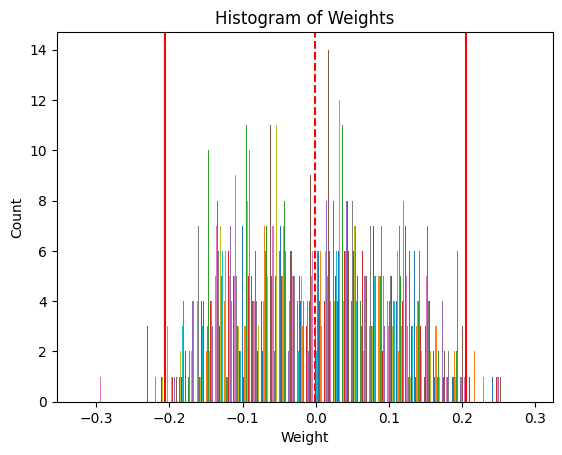

In [56]:
import matplotlib.pyplot as plt
# Calculate the mean and standard deviation of the weights.
mean = np.mean(weights)
sigma = np.std(weights)

# Plot a histogram of the weights.
plt.hist(weights, bins=50)
plt.axvline(mean, color='red', linestyle='dashed')
plt.axvline(mean + 2*sigma, color='red')
plt.axvline(mean - 2*sigma, color='red')
plt.title('Histogram of Weights')
plt.xlabel('Weight')
plt.ylabel('Count')
plt.show()

In [57]:
weight = weights.T
weight

array([[-0.19119023, -0.05306485, -0.16274685, ..., -0.09037579,
        -0.07188258,  0.0136095 ],
       [-0.16170251, -0.08961259,  0.09644163, ...,  0.0480414 ,
        -0.1557935 ,  0.04441858],
       [ 0.13174853,  0.10882872, -0.11754476, ...,  0.01246589,
         0.07553469,  0.16949162],
       ...,
       [ 0.05873619,  0.00252463, -0.1382783 , ...,  0.12651856,
         0.01850983, -0.0270797 ],
       [ 0.08761746,  0.13929255,  0.12583768, ..., -0.18451826,
        -0.08639853,  0.20057221],
       [ 0.03466401, -0.15094851,  0.09350483, ...,  0.02244425,
        -0.0813682 ,  0.11449248]], dtype=float32)

In [58]:
weight.shape

(40, 132)

In [59]:
def Tweights(weight):
    num = []

    for i in range(weight.shape[0]):
        weight_mean = np.mean(weight[i,:])
        weight_std = np.std(weight[i,:])
        threshold = weight_mean + 1.1* weight_std
        nodes_with_weight_above_threshold = np.sum(weight[i, :] > threshold)
        ten_percent_nodes = int(0.1 * weight.shape[1])
        if nodes_with_weight_above_threshold >= ten_percent_nodes:
            num.append(nodes_with_weight_above_threshold)
            print(i,nodes_with_weight_above_threshold,threshold)

    return num

In [60]:
 we= Tweights(weight)

0 21 0.12966049816459418
1 22 0.09805324003100396
2 19 0.12551509626209736
3 20 0.1187826780602336
4 23 0.12444360367953779
5 17 0.10551612535491586
6 23 0.10809614723548294
7 17 0.12468528263270856
8 22 0.10377914458513261
9 23 0.11219649580307306
10 19 0.10257756157079713
11 19 0.09726464822888375
12 23 0.10768506955355407
13 17 0.11125189848244191
14 17 0.11734041715972127
15 18 0.11685735487844796
16 23 0.11820033192634584
17 20 0.11105306623503566
18 19 0.12588159143924715
19 20 0.08306159228086472
20 23 0.10418951902538538
21 22 0.10607811510562898
22 22 0.1373020824044943
23 25 0.09418965950608255
24 17 0.09191952534019948
25 18 0.1066103421151638
26 20 0.1304622644558549
27 25 0.10796061540022493
28 21 0.10680797267705203
29 19 0.1043343098834157
30 19 0.10018304456025363
31 19 0.1167316315113567
32 20 0.11532868719659746
33 18 0.11955013806000353
34 24 0.1033799377270043
35 19 0.12220124778323226
36 19 0.09393873382359744
37 25 0.12978371530771254
38 16 0.1140144587494433
39 1

In [61]:
len(we)

40

In [62]:
pred = np.zeros((40,708))
for i in range(weight.shape[0]):
    weight_mean = np.mean(weight[i,:])
    weight_std = np.std(weight[i,:])
    threshold = weight_mean + 1.1* weight_std
    nodes_with_weight_above_threshold = np.sum(weight[i, :] > threshold)
    ten_percent_nodes = int(0.1 * weight.shape[1])
    if nodes_with_weight_above_threshold >= ten_percent_nodes:
        for h in range(input_data.shape[0]): 
            pred_i = 0
            for j in range(weight.shape[1]):
                weight_value = weight[i,j]
                if weight_value > threshold:
                    pp = np.sum(weight_value*input_data[h,j])
                    pred_i += pp
                    pred[i,h] = pred_i
                

print(pred)

[[-0.60697885 -0.5709796  -0.64276403 ... -0.51933025 -0.44979916
  -0.48968835]
 [-0.68011359 -0.7024443  -0.67822663 ... -0.36491508 -0.46899975
  -0.42307765]
 [-0.72768064 -0.68051119 -0.71266716 ... -0.37131807 -0.37581759
  -0.4187762 ]
 ...
 [-0.77640284 -0.73011306 -0.81797733 ... -0.68186938 -0.58089605
  -0.65829913]
 [-0.60612314 -0.47070431 -0.41192597 ... -0.3392595  -0.31041773
  -0.35361976]
 [-0.77829072 -0.80848626 -0.75142536 ... -0.33701975 -0.46066305
  -0.45993045]]


In [63]:
number_of_zeros = np.count_nonzero( pred == 0)

In [64]:
number_of_zeros

0

In [65]:
pred.shape

(40, 708)

In [66]:
predd = pred[0,:].reshape(59,12)
predd

array([[-0.60697885, -0.5709796 , -0.64276403, -0.65801071, -0.78097515,
        -0.78030361, -0.94917071, -0.94694479, -0.92563113, -0.89928967,
        -0.86317282, -0.84971803],
       [-0.79652644, -0.85146223, -0.89696646, -0.97204666, -0.99165403,
        -0.99768104, -1.00907981, -0.95661396, -0.9597138 , -0.89934933,
        -0.90390827, -0.88074215],
       [-0.92379207, -0.91191408, -0.91034373, -0.94027293, -0.8681558 ,
        -0.8449694 , -0.88362731, -0.85754415, -0.90327906, -0.95281403,
        -0.93692569, -0.91007198],
       [-0.86500757, -0.82493154, -0.80829189, -0.82002035, -0.85538631,
        -0.88256125, -0.92327184, -0.88780032, -0.99904769, -0.97625198,
        -0.9265747 , -0.88875343],
       [-0.83470779, -0.83923493, -0.83660697, -0.8509488 , -0.94764671,
        -0.98154589, -0.91495391, -0.95065713, -0.94337065, -0.98331548,
        -0.87527981, -0.86573893],
       [-0.81009124, -0.82243566, -0.85417224, -0.81699488, -0.92252036,
        -0.9186458 , -

In [67]:
df = pd.read_csv("enso_index.csv")
df

,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,1958,28.33,28.24,28.27,28.27,28.31,27.99,27.32,26.85,26.40,26.45,26.75,26.62
1,1959,27.07,27.18,27.47,27.88,27.70,27.37,26.44,26.09,25.92,26.24,26.04,26.18
2,1960,26.27,26.29,26.98,27.49,27.68,27.24,26.88,26.70,26.44,26.22,26.26,26.22
3,1961,26.23,26.56,26.94,27.36,27.75,27.67,26.89,26.19,25.78,25.71,26.07,25.97
4,1962,25.96,26.19,26.80,27.13,27.05,27.08,26.76,26.33,25.94,25.97,25.75,25.67
5,1963,25.77,26.22,27.18,27.78,27.63,27.62,27.78,27.48,27.40,27.36,27.47,27.62
6,1964,27.34,27.13,27.02,26.95,26.82,26.59,26.33,25.60,25.32,25.37,25.26,25.23
7,1965,25.66,26.19,26.94,27.38,27.99,28.09,27.90,27.97,28.01,28.17,28.12,27.96
8,1966,27.67,27.55,28.21,28.16,27.55,27.64,27.33,26.48,26.27,26.22,26.23,26.03
9,1967,25.88,26.11,26.50,26.74,27.35,27.47,26.97,26.44,25.86,25.97,26.08,25.95


In [68]:
df['avg'] = df[['jun', 'jul', 'aug', 'sep']].mean(axis=1)

In [69]:
df

,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,avg
0,1958,28.33,28.24,28.27,28.27,28.31,27.99,27.32,26.85,26.40,26.45,26.75,26.62,27.1400
1,1959,27.07,27.18,27.47,27.88,27.70,27.37,26.44,26.09,25.92,26.24,26.04,26.18,26.4550
2,1960,26.27,26.29,26.98,27.49,27.68,27.24,26.88,26.70,26.44,26.22,26.26,26.22,26.8150
3,1961,26.23,26.56,26.94,27.36,27.75,27.67,26.89,26.19,25.78,25.71,26.07,25.97,26.6325
4,1962,25.96,26.19,26.80,27.13,27.05,27.08,26.76,26.33,25.94,25.97,25.75,25.67,26.5275
5,1963,25.77,26.22,27.18,27.78,27.63,27.62,27.78,27.48,27.40,27.36,27.47,27.62,27.5700
6,1964,27.34,27.13,27.02,26.95,26.82,26.59,26.33,25.60,25.32,25.37,25.26,25.23,25.9600
7,1965,25.66,26.19,26.94,27.38,27.99,28.09,27.90,27.97,28.01,28.17,28.12,27.96,27.9925
8,1966,27.67,27.55,28.21,28.16,27.55,27.64,27.33,26.48,26.27,26.22,26.23,26.03,26.9300
9,1967,25.88,26.11,26.50,26.74,27.35,27.47,26.97,26.44,25.86,25.97,26.08,25.95,26.6850


In [70]:
predd = pred[1,:].reshape(59,12)
        # Create year and month ranges
years = pd.date_range(start='1958', end='2016', freq='YS').year
months = pd.date_range(start='1975-01', periods=12, freq='MS').strftime('%B')
        # Create the DataFrame
dff = pd.DataFrame(predd, index=years, columns=months)
dff = dff.reset_index()
dff['enso_avg'] = df['avg'].copy()

In [71]:
dff['June'][0]

-0.8186939014464277

In [72]:
dff

,index,January,February,March,April,May,June,July,August,September,October,November,December,enso_avg
0,1958,-0.680114,-0.702444,-0.678227,-0.672077,-0.795192,-0.818694,-0.928181,-0.952712,-0.907560,-0.800219,-0.775699,-0.689567,27.1400
1,1959,-0.618730,-0.589002,-0.649871,-0.750702,-0.774837,-0.781052,-0.811830,-0.753152,-0.645764,-0.697415,-0.783650,-0.827142,26.4550
2,1960,-0.816306,-0.786335,-0.796627,-0.844125,-0.856280,-0.853296,-0.801552,-0.794324,-0.751481,-0.796859,-0.760192,-0.719807,26.8150
3,1961,-0.721681,-0.712097,-0.797793,-0.782343,-0.763840,-0.809787,-0.818009,-0.759759,-0.853793,-0.814042,-0.836000,-0.735937,26.6325
4,1962,-0.679180,-0.705280,-0.676107,-0.667821,-0.598891,-0.642229,-0.638637,-0.696052,-0.698835,-0.787341,-0.787729,-0.732524,26.5275
5,1963,-0.733262,-0.728847,-0.744411,-0.694035,-0.698629,-0.725278,-0.723165,-0.695100,-0.777911,-0.700217,-0.681838,-0.666436,27.5700
6,1964,-0.720961,-0.703881,-0.717085,-0.830718,-0.826878,-0.866604,-0.822997,-0.845729,-0.945904,-0.963026,-0.952146,-0.928249,25.9600
7,1965,-0.846887,-0.798218,-0.787997,-0.812103,-0.842837,-0.873036,-0.860649,-0.871612,-0.842193,-0.887324,-0.910493,-0.878297,27.9925
8,1966,-0.824466,-0.860360,-0.841557,-0.776081,-0.817194,-0.767381,-0.833716,-0.891763,-0.813135,-0.795643,-0.768073,-0.738989,26.9300
9,1967,-0.767835,-0.771862,-0.772995,-0.777054,-0.794669,-0.845128,-0.865022,-0.858906,-0.885152,-0.890708,-0.897184,-0.890846,26.6850


In [73]:
dff.loc[-1] = [1957,0,0,0,0,0, dff['June'][0],dff['July'][0],dff['August'][0], dff['September'][0],dff['October'][0],dff['November'][0],dff['December'][0],dff['enso_avg'][0]]

dff.index = dff.index + 1  # shifting index
dff = dff.sort_index() 

In [74]:
dff

,index,January,February,March,April,May,June,July,August,September,October,November,December,enso_avg
0,1957.0,0.000000,0.000000,0.000000,0.000000,0.000000,-0.818694,-0.928181,-0.952712,-0.907560,-0.800219,-0.775699,-0.689567,27.1400
1,1958.0,-0.680114,-0.702444,-0.678227,-0.672077,-0.795192,-0.818694,-0.928181,-0.952712,-0.907560,-0.800219,-0.775699,-0.689567,27.1400
2,1959.0,-0.618730,-0.589002,-0.649871,-0.750702,-0.774837,-0.781052,-0.811830,-0.753152,-0.645764,-0.697415,-0.783650,-0.827142,26.4550
3,1960.0,-0.816306,-0.786335,-0.796627,-0.844125,-0.856280,-0.853296,-0.801552,-0.794324,-0.751481,-0.796859,-0.760192,-0.719807,26.8150
4,1961.0,-0.721681,-0.712097,-0.797793,-0.782343,-0.763840,-0.809787,-0.818009,-0.759759,-0.853793,-0.814042,-0.836000,-0.735937,26.6325
5,1962.0,-0.679180,-0.705280,-0.676107,-0.667821,-0.598891,-0.642229,-0.638637,-0.696052,-0.698835,-0.787341,-0.787729,-0.732524,26.5275
6,1963.0,-0.733262,-0.728847,-0.744411,-0.694035,-0.698629,-0.725278,-0.723165,-0.695100,-0.777911,-0.700217,-0.681838,-0.666436,27.5700
7,1964.0,-0.720961,-0.703881,-0.717085,-0.830718,-0.826878,-0.866604,-0.822997,-0.845729,-0.945904,-0.963026,-0.952146,-0.928249,25.9600
8,1965.0,-0.846887,-0.798218,-0.787997,-0.812103,-0.842837,-0.873036,-0.860649,-0.871612,-0.842193,-0.887324,-0.910493,-0.878297,27.9925
9,1966.0,-0.824466,-0.860360,-0.841557,-0.776081,-0.817194,-0.767381,-0.833716,-0.891763,-0.813135,-0.795643,-0.768073,-0.738989,26.9300


In [75]:
dff = dff.drop('index',axis=1)

In [76]:
def potential_predictors_new(data):
    for i in range(65):
        pred_pres = data[i,:].reshape(59,12)
        # Create year and month ranges
        years = pd.date_range(start='1958', end='2016', freq='YS').year
        months = pd.date_range(start='1975-01', periods=12, freq='MS').strftime('%B')
        # Create the DataFrame
        
        df_pres = pd.DataFrame(pred_pres, index=years, columns=months)
        df_pres = df_pres.reset_index()
        df_pres['enso_avg'] = df['avg'].copy()
        df_pres.loc[-1] = [1957,0,0,0,0,0, df_pres['June'][0],df_pres['July'][0],df_pres['August'][0], df_pres['September'][0],df_pres['October'][0],df_pres['November'][0],df_pres['December'][0],df_pres['enso_avg'][0]]
        df_pres.index = df_pres.index + 1  # shifting index
        df_pres = df_pres.sort_index() 
        df_pres= df_pres.drop('index',axis=1)
        df_6 = df_pres.iloc[1:, :5]
        df_6 = df_6.reset_index()
        df_12 = df_pres.iloc[0:-1, 6:12]
        df_12 = df_12.reset_index()
        df_13 = df_pres.iloc[1:, [12]]
        df_13 = df_13.reset_index()
        df_last = pd.concat([df_6, df_12, df_13], axis=1)
        df_last = df_last.drop('index',axis=1)
        correlation = df_last.corr(method='pearson')
        second_max_value = correlation['enso_avg'].sort_values(ascending=False)[1]
        negative_minimum = correlation['enso_avg'].sort_values(ascending=False)[-1]
        second_max_index = correlation['enso_avg'].sort_values(ascending=False).index[1]
        negative_min_index = correlation['enso_avg'].sort_values(ascending=False).index[-1]
        print(i,second_max_index,second_max_value,negative_min_index,negative_minimum)
        

In [77]:
potential_predictors_new(pred)

0 May 0.3342372842276352 November 0.04207794692890549
1 July 0.14188753864782935 December -0.02914855687327283
2 May 0.20182924075172617 September 0.027074982787559144
3 September 0.12007157798994171 December -0.055957245813953796
4 May 0.5739983575238252 August 0.06548350762380137
5 May 0.3163992746568372 December -0.07376513576590774
6 May 0.4700333618803823 December 0.0069292241381961415
7 May 0.16902030350052075 November -0.05478483721358615
8 May 0.3099127992532381 November -0.04536259594722578
9 August 0.07854719927586913 March -0.028760487112403182
10 May 0.5180119437304117 July 0.04772922620475953
11 April 0.40397490890680016 August 0.11261052675807634
12 May 0.5462062129472544 December -0.0972963773671792
13 March 0.1773807802401239 December -0.07266978402360476
14 March 0.31686010583004776 October 0.050122436370898436
15 April 0.1643649492294061 August 0.02653031935442108
16 May 0.28074208198772205 November -0.10622540380590323
17 April 0.19467792339943077 December -0.0008406

IndexError: index 40 is out of bounds for axis 0 with size 40

In [ ]:
dff

In [ ]:
df_6 = dff.iloc[1:, :5]

In [ ]:
df_6 = df_6.reset_index()

In [ ]:
df_6

In [ ]:
df_12 = dff.iloc[0:-1, 6:12]

In [ ]:
df_12 = df_12.reset_index()

In [ ]:
df_12

In [ ]:
df_13 = dff.iloc[1:, [12]]

In [ ]:
df_13 = df_13.reset_index()

In [ ]:
df_13

In [ ]:
df_last = pd.concat([df_6, df_12, df_13], axis=1)

In [ ]:
df_last = df_last.drop('index',axis=1)

In [ ]:
df_last

In [ ]:
correlation_ = df_last.corr(method='pearson')
second_max_value_ = abs(correlation_['enso_avg'].sort_values(ascending=False)[1])
second_max_index_ = correlation_['enso_avg'].sort_values(ascending=False).index[1]
print(second_max_index_,second_max_value_)

In [ ]:
correlation_

In [18]:
data_.shape

(708, 89, 180)

In [19]:
data_[0,:,:].shape

(89, 180)

In [20]:
x,y=np.array(latitude),np.array(longitude)

In [21]:
xcoar,ycoar=np.arange(88,-88,-2.5),np.arange(0,360,2.5)

In [22]:
import numpy as np
from scipy.interpolate import RegularGridInterpolator
z = data_[0,:,:]

f = RegularGridInterpolator((x, y), z)
f

In [23]:
pts=np.meshgrid(xcoar,ycoar)
pts[1]

array([[  0. ,   0. ,   0. , ...,   0. ,   0. ,   0. ],
       [  2.5,   2.5,   2.5, ...,   2.5,   2.5,   2.5],
       [  5. ,   5. ,   5. , ...,   5. ,   5. ,   5. ],
       ...,
       [352.5, 352.5, 352.5, ..., 352.5, 352.5, 352.5],
       [355. , 355. , 355. , ..., 355. , 355. , 355. ],
       [357.5, 357.5, 357.5, ..., 357.5, 357.5, 357.5]])

In [24]:
np.shape(pts[0])

(144, 71)

In [25]:
arr=np.empty((len(xcoar),len(ycoar)))
arr

array([[1.07747648e-311, 1.07747595e-311, 2.12199579e-314, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       ...,
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000]])

In [26]:
for j in range(len(arr[0,:])):
    for i in range(len(arr[:,0])):
        arr[i,j]=f([xcoar[i],ycoar[j]])

In [27]:
print(np.shape(arr))

(71, 144)


In [28]:
print(np.shape(arr))
print(np.shape(ycoar))

(71, 144)
(144,)


(89, 180)


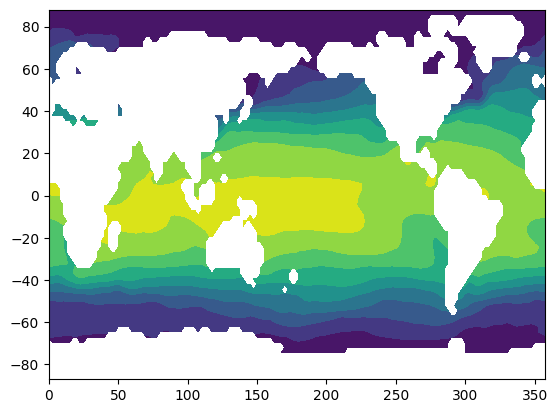

In [29]:
import matplotlib.pyplot as plt
print(data_[0].shape)
# plt.subplot(1,2,1)
# plt.contourf(data_[0])
# plt.subplot(1,2,2)
plt.contourf(ycoar,xcoar,arr)
plt.show()

In [121]:
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.basemap import interp
map = Basemap(llcrnrlon=0., llcrnrlat=-88., urcrnrlon=358., urcrnrlat=88.,
              projection='lcc', lat_1=30., lat_2=60., lat_0=34.83158, lon_0=-98.,
              resolution='i')
x, y = map(longitude, latitude)
x2, y2 = np.meshgrid(xcoar,ycoar)
sst=data_[0]
sst_2 = interp(u10,  x[0], np.flipud(y[:, 0]), x2, np.flipud(y2),order=1)


ProjError: x, y, z, and time must be same size if included.